In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [283]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [284]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [285]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [286]:
train.shape

(8693, 14)

In [287]:
test.shape

(4277, 13)

In [288]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [289]:
train['Cabin'][train['Cabin'].isnull()]

15      NaN
93      NaN
103     NaN
222     NaN
227     NaN
       ... 
8209    NaN
8475    NaN
8485    NaN
8509    NaN
8656    NaN
Name: Cabin, Length: 199, dtype: object

In [290]:
train['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [291]:
train['Cabin'][0]

'B/0/P'

In [292]:
train[['CabinDeck', 'CabinNum', 'CabinSide']] = train['Cabin'].str.split('/', expand=True)

In [293]:
test[['CabinDeck', 'CabinNum', 'CabinSide']] = test['Cabin'].str.split('/', expand=True)

In [294]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [295]:
train['CabinNum'].value_counts()

CabinNum
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: int64

In [296]:
train['CabinSide'].value_counts()

CabinSide
S    4288
P    4206
Name: count, dtype: int64

In [297]:
train['CabinDeck'].value_counts()

CabinDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [298]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S


In [299]:
train[['CabinSide', 'Transported']].groupby('CabinSide').mean()

,Transported
CabinSide,
P,0.451260
S,0.555037


In [300]:
train[['CabinDeck', 'Transported']].groupby('CabinDeck').mean()

,Transported
CabinDeck,
A,0.496094
B,0.734275
C,0.680054
D,0.433054
E,0.357306
F,0.439871
G,0.516217
T,0.200000


In [301]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  CabinDeck     8494 non-null   object 
 15  CabinNum      8494 non-null   object 
 16  CabinSide     8494 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


In [302]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
 13  CabinDeck     4177 non-null   object 
 14  CabinNum      4177 non-null   object 
 15  CabinSide     4177 non-null   object 
dtypes: float64(6), object(10)
memory usage: 534.8+ KB


In [303]:
train.isnull().mean()*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
CabinDeck       2.289198
CabinNum        2.289198
CabinSide       2.289198
dtype: float64

In [304]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [305]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [306]:
train.duplicated().sum()

0

In [307]:
test.duplicated().sum()

0

In [308]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  CabinDeck     8494 non-null   object 
 15  CabinNum      8494 non-null   object 
 16  CabinSide     8494 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


In [309]:
train.shape

(8693, 17)

In [310]:
test.shape

(4277, 16)

In [311]:
train.drop(columns=['PassengerId', 'Name', 'Cabin'], inplace=True)
test.drop(columns=['Name', 'Cabin'], inplace=True)

In [312]:
Pid = test['PassengerId']
test.drop(columns=['PassengerId'], inplace=True)

In [313]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Transported'] = le.fit_transform(train['Transported'])

In [314]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [315]:
train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].corr()['Transported']

Age            -0.075026
RoomService    -0.244611
FoodCourt       0.046566
ShoppingMall    0.010141
Spa            -0.221131
VRDeck         -0.207075
Transported     1.000000
Name: Transported, dtype: float64

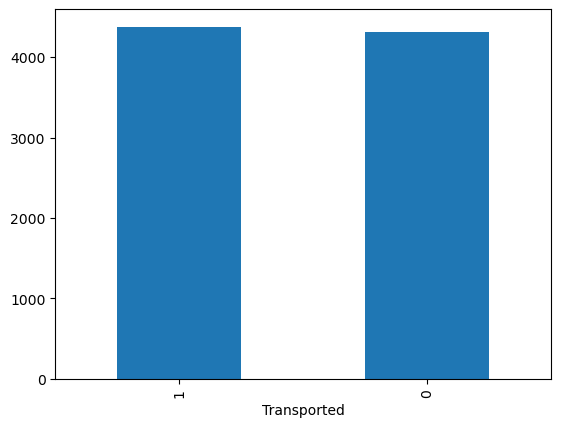

In [316]:
train['Transported'].value_counts().plot(kind='bar')
plt.show()

In [317]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
CabinDeck       199
CabinNum        199
CabinSide       199
dtype: int64

In [318]:
test.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
CabinDeck       100
CabinNum        100
CabinSide       100
dtype: int64

C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

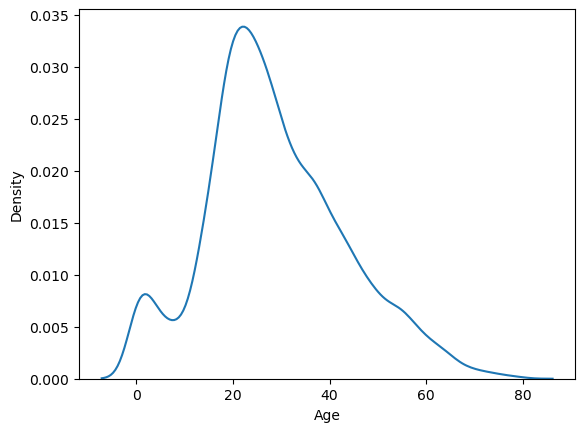

In [319]:
sns.kdeplot(train['Age'])

C:\Users\SHREYA\AppData\Local\Temp\ipykernel_8000\579924133.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(),inplace = True)
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

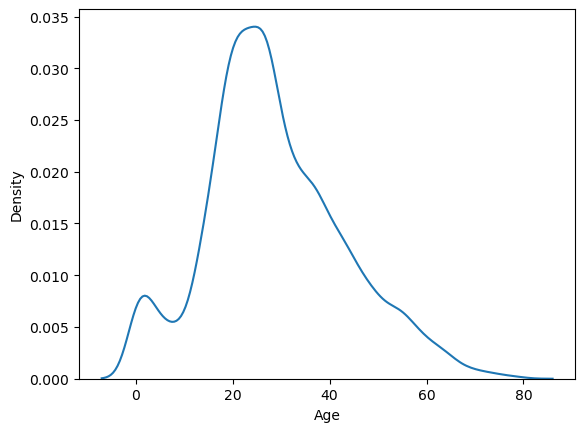

In [320]:
train['Age'].fillna(train['Age'].median(),inplace = True)
sns.kdeplot(train['Age'])

C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

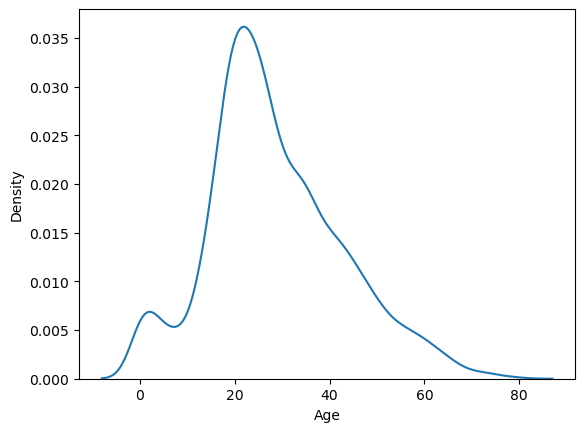

In [321]:
sns.kdeplot(test['Age'])

C:\Users\SHREYA\AppData\Local\Temp\ipykernel_8000\2075717806.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(),inplace = True)
C:\Users\SHREYA\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

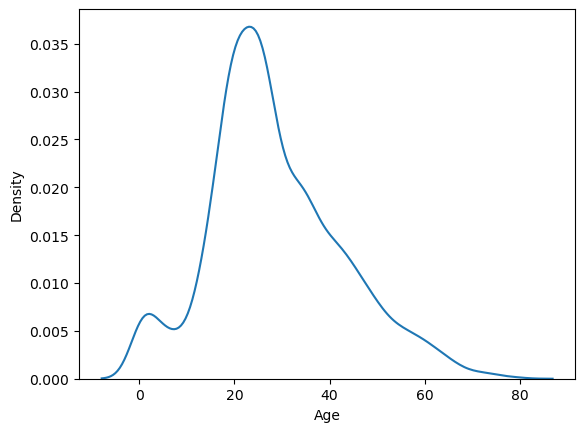

In [322]:
test['Age'].fillna(test['Age'].median(),inplace = True)
sns.kdeplot(test['Age'])

In [323]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
CabinDeck       199
CabinNum        199
CabinSide       199
dtype: int64

In [324]:
train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
train.isnull().sum().sort_values(ascending=False)

HomePlanet      201
CabinDeck       199
CabinNum        199
CabinSide       199
Destination     182
RoomService     181
CryoSleep         0
Age               0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [325]:
test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
test.isnull().sum().sort_values(ascending=False)

CabinDeck       100
CabinNum        100
CabinSide       100
Destination      92
HomePlanet       87
RoomService      82
CryoSleep         0
Age               0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
dtype: int64

In [326]:
train['RoomService'].fillna(train['RoomService'].median(),inplace = True)
test['RoomService'].fillna(test['RoomService'].median(),inplace = True)


C:\Users\SHREYA\AppData\Local\Temp\ipykernel_8000\2259832003.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['RoomService'].fillna(train['RoomService'].median(),inplace = True)
C:\Users\SHREYA\AppData\Local\Temp\ipykernel_8000\2259832003.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [327]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [328]:
train['HomePlanet'] = train['HomePlanet'].fillna('Earth')

In [329]:
test['HomePlanet'] = test['HomePlanet'].fillna('Earth')

In [330]:
train.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
CabinDeck       199
CabinNum        199
CabinSide       199
dtype: int64

In [331]:
train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [332]:
train['Destination'] = train['Destination'].fillna('TRAPPIST-1e')

In [333]:
test['Destination'] = test['Destination'].fillna('TRAPPIST-1e')

In [334]:
train.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
CabinDeck       199
CabinNum        199
CabinSide       199
dtype: int64

In [335]:
train['CabinDeck'].value_counts()

CabinDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [336]:
train['CabinDeck'] = train['CabinDeck'].fillna('F')

In [337]:
test['CabinDeck'] = test['CabinDeck'].fillna('F')

In [338]:
train['CabinSide'].value_counts()

CabinSide
S    4288
P    4206
Name: count, dtype: int64

In [339]:
train['CabinSide'] = train['CabinSide'].fillna('S')
test['CabinSide'] = test['CabinSide'].fillna('S')

In [340]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,F,1,S


In [341]:
train['VRDeck']

0          0.0
1         44.0
2         49.0
3        193.0
4          2.0
         ...  
8688      74.0
8689       0.0
8690       0.0
8691    3235.0
8692      12.0
Name: VRDeck, Length: 8693, dtype: float64

In [342]:
train['CabinNum'].value_counts()

CabinNum
82      28
86      22
19      22
56      21
176     21
        ..
1644     1
1515     1
1639     1
1277     1
1894     1
Name: count, Length: 1817, dtype: int64

In [343]:
train['CabinNum'] = train['CabinNum'].fillna('82')
test['CabinNum'] = test['CabinNum'].fillna('82')

In [344]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinNum        0
CabinSide       0
dtype: int64

In [345]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
CabinDeck       0
CabinNum        0
CabinSide       0
dtype: int64

In [346]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  CabinDeck     8693 non-null   object 
 12  CabinNum      8693 non-null   object 
 13  CabinSide     8693 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 950.9+ KB


In [347]:
train = train.astype({'Age': int, 'Spa': int, 'RoomService': int, 'FoodCourt': int, 'ShoppingMall': int, 'VRDeck': int, 'CabinNum': int})
test = test.astype({'Age': int, 'Spa': int, 'RoomService': int, 'FoodCourt': int, 'ShoppingMall': int, 'VRDeck': int, 'CabinNum': int})

In [348]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39,False,0,0,0,0,0,0,B,0,P
1,Earth,False,TRAPPIST-1e,24,False,109,9,25,549,44,1,F,0,S
2,Europa,False,TRAPPIST-1e,58,True,43,3576,0,6715,49,0,A,0,S
3,Europa,False,TRAPPIST-1e,33,False,0,1283,371,3329,193,0,A,0,S
4,Earth,False,TRAPPIST-1e,16,False,303,70,151,565,2,1,F,1,S


In [349]:
train.shape

(8693, 14)

In [350]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
0,Earth,True,TRAPPIST-1e,27,False,0,0,0,0,0,G,3,S
1,Earth,False,TRAPPIST-1e,19,False,0,9,0,2823,0,F,4,S
2,Europa,True,55 Cancri e,31,False,0,0,0,0,0,C,0,S
3,Europa,False,TRAPPIST-1e,38,False,0,6652,0,181,585,C,1,S
4,Earth,False,TRAPPIST-1e,20,False,10,0,635,0,0,F,5,S


In [351]:
test.shape

(4277, 13)

In [352]:
X = train.drop(columns=['Transported'])
y = train.iloc[:, -4]

In [353]:
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
0,Europa,False,TRAPPIST-1e,39,False,0,0,0,0,0,B,0,P
1,Earth,False,TRAPPIST-1e,24,False,109,9,25,549,44,F,0,S
2,Europa,False,TRAPPIST-1e,58,True,43,3576,0,6715,49,A,0,S
3,Europa,False,TRAPPIST-1e,33,False,0,1283,371,3329,193,A,0,S
4,Earth,False,TRAPPIST-1e,16,False,303,70,151,565,2,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41,True,0,6819,0,1643,74,A,98,P
8689,Earth,True,PSO J318.5-22,18,False,0,0,0,0,0,G,1499,S
8690,Earth,False,TRAPPIST-1e,26,False,0,0,1872,1,0,G,1500,S
8691,Europa,False,55 Cancri e,32,False,0,1049,0,353,3235,E,608,S


In [354]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [355]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [356]:
X_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
2333,Earth,False,TRAPPIST-1e,28,False,0,55,0,656,0,F,82,S
2589,Earth,False,TRAPPIST-1e,17,False,0,1195,31,0,0,F,575,P
8302,Europa,True,55 Cancri e,28,False,0,0,0,0,0,C,329,S
8177,Mars,False,TRAPPIST-1e,20,False,0,2,289,976,0,F,1800,P
500,Europa,True,55 Cancri e,36,False,0,0,0,0,0,C,18,P


In [357]:
X_train.shape

(6954, 13)

In [358]:
X_test.shape

(1739, 13)

In [359]:
X_train['VIP'].value_counts()

VIP
False    6798
True      156
Name: count, dtype: int64

In [360]:
X_test['VIP'].value_counts()

VIP
False    1696
True       43
Name: count, dtype: int64

In [361]:
y_train.shape

(6954,)

In [362]:
y_test.shape

(1739,)

In [363]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
2333,Earth,False,TRAPPIST-1e,28,False,0,55,0,656,0,F,82,S
2589,Earth,False,TRAPPIST-1e,17,False,0,1195,31,0,0,F,575,P
8302,Europa,True,55 Cancri e,28,False,0,0,0,0,0,C,329,S
8177,Mars,False,TRAPPIST-1e,20,False,0,2,289,976,0,F,1800,P
500,Europa,True,55 Cancri e,36,False,0,0,0,0,0,C,18,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,Earth,0,TRAPPIST-1e,18,False,14,2,144,610,0,G,988,S
5191,Mars,False,TRAPPIST-1e,50,0,690,0,30,762,428,F,1063,S
5390,Earth,False,PSO J318.5-22,22,False,158,0,476,0,26,F,1194,P
860,Mars,False,TRAPPIST-1e,34,False,379,0,1626,0,0,F,191,P


In [364]:
X_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
304,Mars,False,TRAPPIST-1e,19,False,417,349,634,3,1057,F,63,S
2697,Earth,False,TRAPPIST-1e,18,False,4,904,0,0,1,G,460,S
8424,Earth,True,TRAPPIST-1e,41,False,0,0,0,0,0,G,1449,S
1672,Earth,False,TRAPPIST-1e,35,False,0,338,436,0,0,G,291,P
8458,Europa,True,TRAPPIST-1e,43,False,0,0,0,0,0,D,288,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7175,Earth,True,TRAPPIST-1e,16,False,0,0,0,0,0,G,1244,S
3187,Earth,True,TRAPPIST-1e,0,False,0,0,0,0,0,G,553,S
1302,Earth,False,TRAPPIST-1e,17,False,21,0,690,260,5,E,105,S
5934,Mars,True,TRAPPIST-1e,42,False,0,0,0,0,0,F,1303,P


In [365]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 2333 to 7270
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    6954 non-null   object
 1   CryoSleep     6954 non-null   object
 2   Destination   6954 non-null   object
 3   Age           6954 non-null   int32 
 4   VIP           6954 non-null   object
 5   RoomService   6954 non-null   int32 
 6   FoodCourt     6954 non-null   int32 
 7   ShoppingMall  6954 non-null   int32 
 8   Spa           6954 non-null   int32 
 9   VRDeck        6954 non-null   int32 
 10  CabinDeck     6954 non-null   object
 11  CabinNum      6954 non-null   int32 
 12  CabinSide     6954 non-null   object
dtypes: int32(7), object(6)
memory usage: 570.4+ KB


In [366]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 304 to 6093
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    1739 non-null   object
 1   CryoSleep     1739 non-null   object
 2   Destination   1739 non-null   object
 3   Age           1739 non-null   int32 
 4   VIP           1739 non-null   object
 5   RoomService   1739 non-null   int32 
 6   FoodCourt     1739 non-null   int32 
 7   ShoppingMall  1739 non-null   int32 
 8   Spa           1739 non-null   int32 
 9   VRDeck        1739 non-null   int32 
 10  CabinDeck     1739 non-null   object
 11  CabinNum      1739 non-null   int32 
 12  CabinSide     1739 non-null   object
dtypes: int32(7), object(6)
memory usage: 142.7+ KB


In [367]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'CabinDeck', 'CabinSide']),
    ('tnf3', StandardScaler(), ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNum'])
], remainder='passthrough')

In [368]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [369]:
feature_names = transformer.get_feature_names_out()
print("Number of features:", len(feature_names))
print("Feature names:", feature_names)

Number of features: 21
Feature names: ['tnf1__HomePlanet_Europa' 'tnf1__HomePlanet_Mars' 'tnf1__CryoSleep_True'
 'tnf1__Destination_PSO J318.5-22' 'tnf1__Destination_TRAPPIST-1e'
 'tnf1__VIP_True' 'tnf1__CabinDeck_B' 'tnf1__CabinDeck_C'
 'tnf1__CabinDeck_D' 'tnf1__CabinDeck_E' 'tnf1__CabinDeck_F'
 'tnf1__CabinDeck_G' 'tnf1__CabinDeck_T' 'tnf1__CabinSide_S' 'tnf3__Age'
 'tnf3__RoomService' 'tnf3__FoodCourt' 'tnf3__ShoppingMall' 'tnf3__Spa'
 'tnf3__VRDeck' 'tnf3__CabinNum']


In [370]:
X_train_transformed.shape

(6954, 21)

In [371]:
X_test_transformed.shape

(1739, 21)

In [372]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [373]:
# K-Nearest Neighbors
knc = KNeighborsClassifier(n_neighbors=5)

# Decision Tree
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)

# Logistic Regression
lrc = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)

# Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# AdaBoost
abc = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')

# Bagging
bc = BaggingClassifier(n_estimators=50, random_state=42)

# Extra Trees
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Gradient Boosting
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=42)

# XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42)

# Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Support Vector Machines
svc = SVC(kernel='rbf', random_state=42)
lsvc = LinearSVC(random_state=42)

# Gaussian Process
gpc = GaussianProcessClassifier(random_state=42)

# LightGBM
lgbm = LGBMClassifier(n_estimators=100, random_state=42)

# CatBoost
cbc = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1, 
                           depth=6, 
                           eval_metric='Accuracy', 
                           random_seed=42,
                           verbose=100)

In [374]:
clfs = {
    'KNN': knc,  # K-Nearest Neighbors
    'DT': dtc,   # Decision Tree
    'LR': lrc,   # Logistic Regression
    'RF': rfc,   # Random Forest
    'AdaBoost': abc,  # AdaBoost
    'BgC': bc,   # Bagging Classifier
    'ETC': etc,  # Extra Trees Classifier
    'GBDT': gbdt,  # Gradient Boosting Decision Tree
    'XGB': xgb,  # XGBoost
    'GNB': gnb,  # Gaussian Naive Bayes
    #'MNB': mnb,  # Multinomial Naive Bayes
    'BNB': bnb,  # Bernoulli Naive Bayes
    'LinearSVC': lsvc,  # Linear Support Vector Classifier
    'LGBM': lgbm,  # LightGBM
    'CatBoost': cbc  # CatBoost
}

In [375]:
from sklearn.metrics import accuracy_score

def train_classifier(clf,X_train_transformed,y_train,X_test_transformed,y_test):
    clf.fit(X_train_transformed,y_train)
    y_pred = clf.predict(X_test_transformed)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [376]:
acc_scores = []
for name,clf in clfs.items():
    current_acc = train_classifier(clf, X_train_transformed,y_train,X_test_transformed,y_test)
    print("Name: ", name)
    print("Accuracy Score: ", current_acc)
    acc_scores.append(current_acc)

Name:  KNN
Accuracy Score:  0.7797584818861415
Name:  DT
Accuracy Score:  0.7671075330649799
Name:  LR
Accuracy Score:  0.7832087406555491
Name:  RF
Accuracy Score:  0.7952846463484762
Name:  AdaBoost
Accuracy Score:  0.7688326624496837
Name:  BgC
Accuracy Score:  0.7958596894767107
Name:  ETC
Accuracy Score:  0.79700977573318
Name:  GBDT
Accuracy Score:  0.7981598619896493
Name:  XGB
Accuracy Score:  0.7878090856814262
Name:  GNB
Accuracy Score:  0.7170787809085681
Name:  BNB
Accuracy Score:  0.7481311098332375
Name:  LinearSVC
Accuracy Score:  0.7814836112708453
[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 20
[LightGB

In [377]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy': acc_scores}).sort_values('Accuracy',ascending=False)

In [378]:
performance_df

,Algorithm,Accuracy
12,LGBM,0.809086
13,CatBoost,0.802185
7,GBDT,0.798160
6,ETC,0.797010
5,BgC,0.795860
3,RF,0.795285
8,XGB,0.787809
2,LR,0.783209
11,LinearSVC,0.781484
0,KNN,0.779758


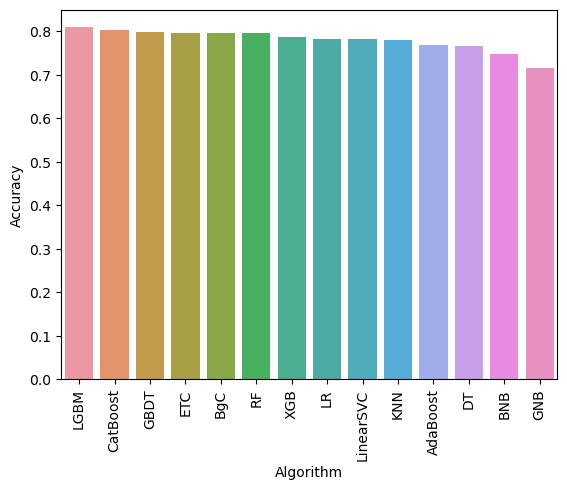

In [379]:
sns.barplot(x = performance_df['Algorithm'], y = performance_df['Accuracy'])
plt.xticks(rotation = 'vertical')
plt.show()

In [380]:
Xf_transformed = transformer.transform(test)

In [381]:
Xf_transformed

array([[ 0.        ,  0.        ,  1.        , ..., -0.27942718,
        -0.25684323, -1.15015588],
       [ 0.        ,  0.        ,  0.        , ...,  2.26836343,
        -0.25684323, -1.14820007],
       [ 1.        ,  0.        ,  1.        , ..., -0.27942718,
        -0.25684323, -1.15602333],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.27942718,
        -0.25684323, -0.57710196],
       [ 1.        ,  0.        ,  0.        , ..., -0.27942718,
         0.19455455, -0.57514615],
       [ 0.        ,  0.        ,  1.        , ..., -0.27942718,
        -0.25684323,  1.7737882 ]])

In [382]:
clf1 = LGBMClassifier(n_estimators=100, random_state=42)

In [383]:
clf1.fit(X_train_transformed, y_train)

[LightGBM] [Info] Number of positive: 3500, number of negative: 3454
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503307 -> initscore=0.013230
[LightGBM] [Info] Start training from score 0.013230


LGBMClassifier(random_state=42)

In [384]:
y_pred1 = clf1.predict(X_test_transformed)

In [385]:
y_pred1.shape

(1739,)

In [386]:
y_pred1

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [387]:
accuracy_score(y_test, y_pred1)

0.8090856814261069

In [388]:
yf1=clf1.predict(Xf_transformed)

In [389]:
yf1.shape

(4277,)

In [390]:
submission1=pd.DataFrame()

In [391]:
submission1['PassengerId']=Pid
submission1['Transported']=yf1

In [392]:
def func(num):
    if num == 1:
        return True
    else:
        return False

In [393]:
submission1['Transported']=submission1['Transported'].apply(func)

In [394]:
submission1.sample(5)

,PassengerId,Transported
2004,4310_01,False
3173,6948_01,True
3860,8439_01,False
2870,6312_01,True
1940,4164_01,True


In [395]:
submission1.to_csv('submission1.csv', index=False)